In [49]:
using Pkg
Pkg.activate("../.")
using Revise
using Network

  Activating project at `~/Documents/Programmierung/Julia/08_Projects/NetworkOptimization`


# Network 

This package is build on `Graph.jl` and `SimpleWeightedGraphs`. It just tailors these packages for my personal use. 

Some algorithms are implemented by myself. There are not more efficient or better. Just to know how to implement them.

Define a random undirected and unweighted network with $n$ nodes and an edge density of $\rho$:

In [50]:
n = 20
ρ=0.1
net = Network.rand_network(n,ρ; weights=1:10) # weights are in range 1:m (m=1)

{20, 26} undirected simple Int64 graph with Float64 weights

Plot the network (using `GraphPlot` with some predefined parameters). So it is just a shortcut, but works for a lot of graphs. Of course you can use `gplot` directly.

directed = !(is_symmetric(netw1)) = true


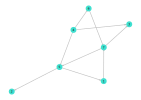

In [73]:
Network.plot_network(net; label=false)

Define a directed network with $n$ nodes and an edge density of $\rho$. The network ist weighted with randomly edge_weights between the range $R$:

directed = !(is_symmetric(netw1)) = true


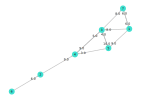

In [76]:
n = 7
ρ = 0.2
R  = 1:10
net = Network.rand_directed_network(n,ρ;weights=R)
plot_network(net)

The network $net$ is of type `SimpleWeightedGraph`. So you can the complete functionality of `Graph.jl` and `SimpleWeightedGraphs.jl`.

In [6]:
typeof(net)

SimpleWeightedGraphs.SimpleWeightedDiGraph{Int64, Float64}

In [70]:
using Graphs, SimpleWeightedGraphs

In [72]:
@show nv(net) # number of vertices
@show ne(net); # number of edges
@show has_self_loops(net)
@show is_directed(net)
@show eltype(net);
@show Graphs.neighbors(net,7);
@show Network.parents(net,7);
@show Network.neighbors(net,7); # neighbors are children and parents together!

nv(net) = 7
ne(net) = 9
has_self_loops(net) = false
is_directed(net) = true
eltype(net) = Int64
Graphs.neighbors(net, 7) = [1, 6]
Network.parents(net, 7) = [1, 6]
Network.neighbors(net, 7) = [3, 5, 1, 6]


Or you define a graph $g$ from generators of `Graph.jl`:

In [81]:
g1 = path_digraph(100);
g2 = Graphs.SimpleGraphs.grid([5,5]);

In [82]:
p1 = Network.plot_graph(g1);
p2 = Network.plot_graph(g2);


directed = !(is_symmetric(netw1)) = true
directed = !(is_symmetric(netw1)) = false


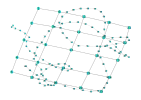

In [99]:
using Compose
compose(p1,p2)